In [ ]:
import sys
sys.path.append('..')

import pandas as pd

from ib_insync import *
from BacktestApp import BacktestApp
from RBreak import RBreak

class RBreakBacktestApp(BacktestApp):
    def __init__(self, config_file="config.yml", **kwargs):
        super().__init__(config_file=config_file, **kwargs)
        self.rbreaks = { contract.symbol: RBreak(self.ib, contract, self.pm) for contract in self.contracts }
        self.afterMarketCloseEvent.append(self.after_market_close)
        self.is_first_day = True
        self.daily = {}
        
    def getDailyQuote(self, end_date, durationStr):
        for contract in self.contracts:
            self.daily[contract.symbol] = self.get_historical_data(contract, end_date, durationStr, '1 day').set_index("date", drop=False)
        
    def after_market_close(self, date):
        if self.is_first_day: self.is_first_day = False
        today = date.date()
        print('after_market_close', today)
        for contract in self.contracts:
            df = self.daily[contract.symbol].loc[today]
            self.rbreaks[contract.symbol].setParams(df)
        
    def on_bar_update(self, contract, bars, has_new_bar):
        if not self.is_first_day and has_new_bar:
            self.rbreaks[contract.symbol].update(bars)
            
ba = RBreakBacktestApp(config_file="../config_backtest.yml", host="host.docker.internal", clientId=18, debug=True)
end_date, durationStr = ("20250221", "200 D")
ba.getDailyQuote(end_date, durationStr)
ba.minutes_backtest(end_date, durationStr)

after_market_close 2024-05-06
after_market_close 2024-05-07
after_market_close 2024-05-08
after_market_close 2024-05-09
after_market_close 2024-05-10
after_market_close 2024-05-13
after_market_close 2024-05-14
after_market_close 2024-05-15
after_market_close 2024-05-16
【2024-05-17 14:23:00-04:00】【RBreak】开仓: NVDA, 价格: 91.97, 数量：-1090, 浮动盈亏：None
after_market_close 2024-05-17
【2024-05-20 09:31:00-04:00】【RBreak】平仓: NVDA, 价格: 93.97, 数量：1090, 浮动盈亏：-2180.0
after_market_close 2024-05-20
after_market_close 2024-05-21
after_market_close 2024-05-22
【2024-05-23 09:30:00-04:00】【RBreak】开仓: NVDA, 价格: 102.46, 数量：980, 浮动盈亏：None
after_market_close 2024-05-23
after_market_close 2024-05-24
after_market_close 2024-05-28
after_market_close 2024-05-29
after_market_close 2024-05-30
after_market_close 2024-05-31
after_market_close 2024-06-03
after_market_close 2024-06-04
after_market_close 2024-06-05
after_market_close 2024-06-06
after_market_close 2024-06-07
after_market_close 2024-06-10
after_market_close 20

Peer closed connection.


In [2]:
ba.statistic()

{'cumulative_pnl': np.float64(29103.197919999948),
 'max_drawdown': np.float64(0.028456717609632327),
 'sharpe_ratio': np.float64(0.05158456496246966),
 'volatility': np.float64(0.05586181244933808),
 'daily_return': np.float64(0.00015032383846513562)}

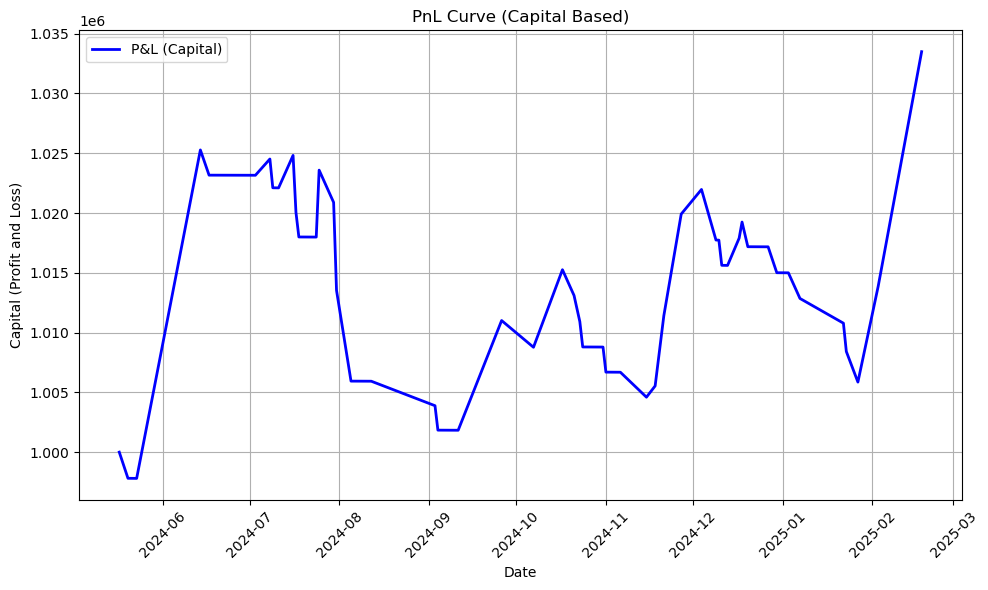

In [3]:
ba.plot_pnl()